In [2]:
import pandas as pds
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
    

In [3]:
# load csv files into dataframes
# the paramaters low_memory=False, dtype=str tell pandas not to guess the datatype
# and make everything a string
# note: many posts say low_memory=False doesn't do anything ... 
df_patients = pds.read_csv('patients.csv', low_memory=False, dtype=str, encoding='utf-8')
df_patients_teeth = pds.read_csv('patient_teeth.csv', low_memory=False, dtype=str, encoding='utf-8')
df_tooth_caries = pds.read_csv('tooth_caries.csv', low_memory=False, dtype=str, encoding='utf-8')
df_tooth_surface_caries = pds.read_csv('tooth_surface_caries.csv', low_memory=False, dtype=str, encoding='utf-8')
df_tooth_procedures = pds.read_csv('tooth_procedures_no_es.csv', low_memory=False, dtype=str, encoding='utf-8')
df_tooth_surface_procedures = pds.read_csv('tooth_surface_procedures_no_es.csv', low_memory=False, dtype=str, encoding='utf-8')

In [4]:
# drop duplicates from dataframes
df_patients.drop_duplicates(inplace=True)
df_patients_teeth.drop_duplicates(inplace=True)
df_tooth_caries.drop_duplicates(inplace=True)
df_tooth_surface_caries.drop_duplicates(inplace=True)
df_tooth_procedures.drop_duplicates(inplace=True)
df_tooth_surface_procedures.drop_duplicates(inplace=True)

In [5]:
# testing output
# df_patients.head() # good
# df_patients_teeth.head() # good
# df_tooth_caries.head() # good
# df_tooth_surface_caries.head() # good
# df_tooth_procedures.head() # good
# df_tooth_surface_procedures.head() # good

In [6]:
len(df_patients) # 229,414

229414

In [ ]:
len(df_patients_teeth) # 1,231,726

In [8]:
# print number of patients
# alternative method: df_patients.count() # 229,414
# len(df_patients) # simplier -> 229,414

# get counts of genders
group = df_patients.gender.value_counts()

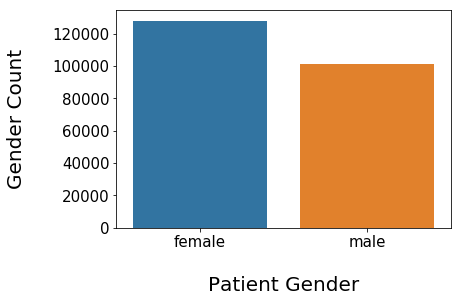

In [9]:
# plot gender counts
# ax = sns.countplot(x="gender", data=group)
ax = sns.barplot(x=group.index, y=group.values)
ax.set_xlabel("\nPatient Gender", size=20)
ax.set_ylabel("Gender Count\n", size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [10]:
# merge, patients, teeth data frames
df_teeth = pds.merge(df_patients, df_patients_teeth, \
                             how='inner', on=['patient_id'])
df_teeth.drop_duplicates(inplace=True)
# df_teeth.head()

In [11]:
# len(df_teeth) # left join -> 1,238,655; inner join -> 1,227,812; right join -> 1,227,812
# len(df_patients_teeth) # 1,227,812

In [12]:
# merge teeth and procedures data frames
temp = df_tooth_procedures[df_tooth_procedures.tooth_id.isin(df_teeth.tooth_id)]
# len(df_tooth_procedures) # 1,681,694
# len(temp) # 1,675,416

df_procedures = pds.merge(df_teeth, temp, how='left', on=['tooth_id', 'tooth_num'])
# len(df_procedures) # 1,682,057
# df_procedures.head()

In [13]:
# merge procedures with surface information
# this final dataset will be the 'observations' dataset
temp = df_tooth_surface_procedures[df_tooth_surface_procedures.event_id.isin(df_procedures.event_id)]
# len(df_tooth_surface_procedures) # 1,245,022
# len(temp) # 1,241,352

df_obs = pds.merge(df_procedures, temp, how='left', on=['event_id', 'tooth_id', 'tooth_num'])
len(df_obs) # 1,682,057; this matches df_procedures count above ... good

1696526

In [14]:
df_extracted = df_obs[df_obs.extract_date.notnull()][['tooth_id','tooth_num']]
# df_extracted = df_obs[df_obs.extract_date.notna()][['tooth_id','tooth_num']]
df_extracted.tooth_num = pds.to_numeric(df_extracted.tooth_num)
df_extracted.drop_duplicates(inplace=True)
df_extracted.head()
df_extracted.groupby('tooth_num').count()
# len(df_extracted) # isnull -> 1,617,783; isna -> 1,617,783; notnull -> 41,331; notna -> 41,331

,tooth_id
tooth_num,
1,953
2,2098
3,1831
4,1373
5,1226
6,624
7,842
8,740
9,772


In [15]:
temp1 = df_obs[['tooth_num', 'tooth_id', 'extract_date']] #.fillna(0)
len(temp1)
# temp2 = temp1[temp1.extract_date == 0]
# temp2 = temp1.query("extract_date != extract_date")
temp2 = temp1[temp1.extract_date.notnull()]
# temp2.drop_duplicates(inplace=True)
temp3 = temp2[['tooth_num', 'tooth_id']]
print(len(temp3))
# temp3.groupby('tooth_num').size()
temp3.drop_duplicates(inplace=True)
temp3.tooth_num.value_counts()
# print(len(temp3))
# temp2.head()
# temp3.groupby('tooth_num').size()
# temp2.tooth_num.value_counts()
# temp3 = temp2.query("tooth_num == '1'")
# temp3.drop_duplicates(inplace=True)
# print(len(temp3))

89804


/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


15    2275
31    2186
2     2098
18    2055
30    1968
19    1941
3     1831
14    1819
4     1373
13    1354
5     1226
12    1226
29    1051
20    1022
16     962
1      953
17     898
32     875
7      842
10     817
9      772
8      740
6      624
11     603
28     598
21     551
25     368
24     336
23     321
26     316
27     240
22     236
Name: tooth_num, dtype: int64

In [16]:
temp4 = temp3.query("tooth_num == '1'")
temp4.head()

,tooth_num,tooth_id
275,1,A_1_1_1_1
1084,1,A_1_1_149_1
8836,1,A_1_1_2946_1
13571,1,A_1_1_3302_1
15481,1,A_1_1_3046_1


In [17]:
# print column names for easy reference
print(df_obs.columns)

Index(['practice', 'patient_id', 'gender', 'dob', 'first_visit', 'last_visit',
       'tooth_id', 'tooth_num', 'first_PCR', 'first_RCT', 'extract_date',
       'missing_date', 'event_id', 'event_name', 'event_date', 'ada_code', 'm',
       'o', 'd', 'b', 'l', 'f', 'i'],
      dtype='object')


In [18]:
# convert columns to datetime datatype (in case they aren't stored as datetimes)
df_obs.dob = pds.to_datetime(df_obs.dob)
df_obs.first_visit = pds.to_datetime(df_obs.first_visit, errors = 'coerce')
df_obs.last_visit = pds.to_datetime(df_obs.last_visit, errors = 'coerce')
df_obs.first_PCR = pds.to_datetime(df_obs.first_PCR, errors = 'coerce')
df_obs.first_RCT = pds.to_datetime(df_obs.first_RCT, errors = 'coerce')
df_obs.event_date = pds.to_datetime(df_obs.event_date, errors = 'coerce')
df_obs.extract_date = pds.to_datetime(df_obs.extract_date, errors = 'coerce')
df_obs.missing_date = pds.to_datetime(df_obs.missing_date, errors = 'coerce')

# df_obs.head()

In [19]:
# add patient ages to observations (using year 2017)
df_obs['patient_age'] = 2017 - pds.to_datetime(df_obs.dob).dt.year

# df_obs[['dob', 'patient_age']].head()

In [20]:
# some of the patient ages are less than zero due to bad DOB data
# let's drop the records
df_obs = pds.DataFrame(df_obs.query('patient_age > 0'))

# df_obs[['dob', 'patient_age']].head()
# df_obs.head()

In [21]:
# df_teeth.tooth_num.count()
# df_teeth.groupby('tooth_num').count()

# temp = df_teeth[~np.isnat(df_teeth.extract_date)]
# temp = df_teeth[~df_teeth.extract_date.isnull()]
# temp = temp.query("tooth_num == '7'")
# temp.groupby('tooth_num').count()
# temp.head()

In [22]:
# create dataframe of patient demographics
# note the use of drop_duplicates so that we have distict patients
df_demographics = df_obs[['practice', 'patient_id', 'gender', 'dob', 'patient_age']].drop_duplicates()

# df_demographics.head()

In [23]:
# create separate dataframes for genders
# there is probably a better way to do this ...
df_females = df_demographics.query("gender == 'female'")[['gender', 'patient_age']]
df_males = df_demographics.query("gender == 'male'")[['gender', 'patient_age']]

# testing output
# df_females.head()
# print(len(df_females))
# df_females.groupby('patient_age').count()

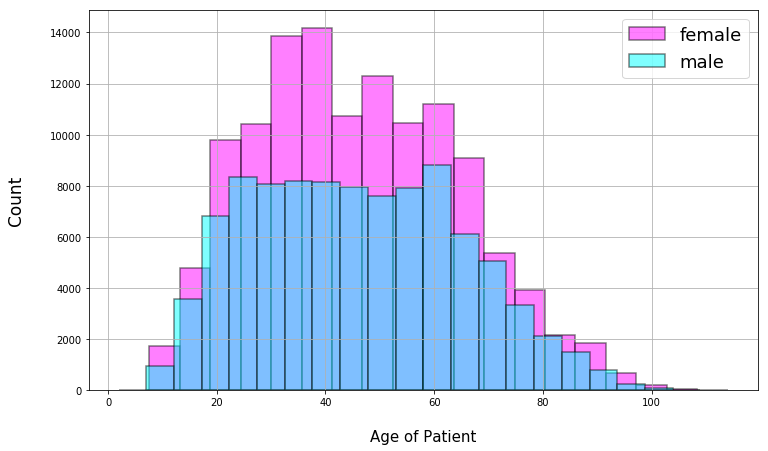

In [24]:
# plot age/gender distribution
ax = df_females["patient_age"]\
        .hist(bins=20, alpha=0.5, color='magenta', label='female', edgecolor='black', linewidth=1.5,figsize=(12,7))
ax = df_males["patient_age"]\
        .hist(bins=20, alpha=0.5, color='cyan', label='male', edgecolor='black', linewidth=1.5, figsize=(12,7))

ax.set_xlabel("\nAge of Patient", fontsize=15)
ax.set_ylabel("Count\n", fontsize=17)

plt.legend(loc='upper right', prop={'size': 18})
plt.show()

In [25]:
# build dataframe of restorations on surfaces
df_fillings = df_obs[['tooth_id', 'tooth_num', 'ada_code', 'event_name', 'm','o', 'd', 'b', 'l', 'f', 'i']]
# df_fillings = df_fillings.query(""" \
#                     ada_code.str.startswith('D') \
#                     and event_name.str.contains('filling') \
#                     and (m==1 or o==1 or d==1 or b==1 or l==1 or f==1 or i==1)"""
#                     , engine="python") # engine="python" is needed for str functions to work
# df_fillings = df_fillings.query(""" m==1 or o==1 or d==1 or b==1 or l==1 or f==1 or i==1"""
#                                     , engine="python") # engine="python" is needed for str functions to work
df_fillings.m = pds.to_numeric(df_fillings.m)
df_fillings.o = pds.to_numeric(df_fillings.o)
df_fillings.d = pds.to_numeric(df_fillings.d)
df_fillings.b = pds.to_numeric(df_fillings.b)
df_fillings.l = pds.to_numeric(df_fillings.l)
df_fillings.f = pds.to_numeric(df_fillings.f)
df_fillings.i = pds.to_numeric(df_fillings.i)
# df_fillings.head()

/usr/local/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [26]:
# add column with number of surfaces restored during procedure
df_fillings['num_restored_surfaces'] = df_fillings.m + df_fillings.o + df_fillings.d \
                                       + df_fillings.b + df_fillings.l + df_fillings.f + df_fillings.i

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
df_fillings.num_restored_surfaces = pds.to_numeric(df_fillings.num_restored_surfaces)
df_fillings = df_fillings[df_fillings.num_restored_surfaces > 0]
df_fillings.head()

/usr/local/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,tooth_id,tooth_num,ada_code,event_name,m,o,d,b,l,f,i,num_restored_surfaces
10,A_1_1_155_15,15,D2150,amalgam filling restoration procedure,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
14,A_1_1_155_31,31,D2391,resin filling restoration procedure,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
18,A_1_1_155_30,30,D2391,resin filling restoration procedure,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
26,A_1_1_155_20,20,D2150,amalgam filling restoration procedure,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
27,A_1_1_155_8,8,D2330,resin filling restoration procedure,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [28]:
# df_fillings.head()

In [29]:
# find number of procedures per tooth
# tooth_counts = pds.DataFrame(df_fillings.groupby('tooth_num')['tooth_num'].count())
tooth_counts = df_fillings.groupby('tooth_num')['tooth_num'].count()
# tooth_counts['num_int'] = tooth_counts.
tooth_counts.columns = ['count']
tooth_counts.index = pds.to_numeric(tooth_counts.index)
tooth_counts.sort_index(inplace=True) # sort data by tooth number 1 -> 32
tooth_counts

tooth_num
1      5557
2     70930
3     83304
4     47524
5     41943
6     26819
7     31896
8     41835
9     40930
10    31771
11    27314
12    41213
13    45505
14    82109
15    73201
16     5720
17     8883
18    77981
19    80683
20    44953
21    27576
22    13604
23    10007
24    12255
25    11986
26     9916
27    13670
28    27844
29    45195
30    82534
31    77107
32     8840
Name: tooth_num, dtype: int64

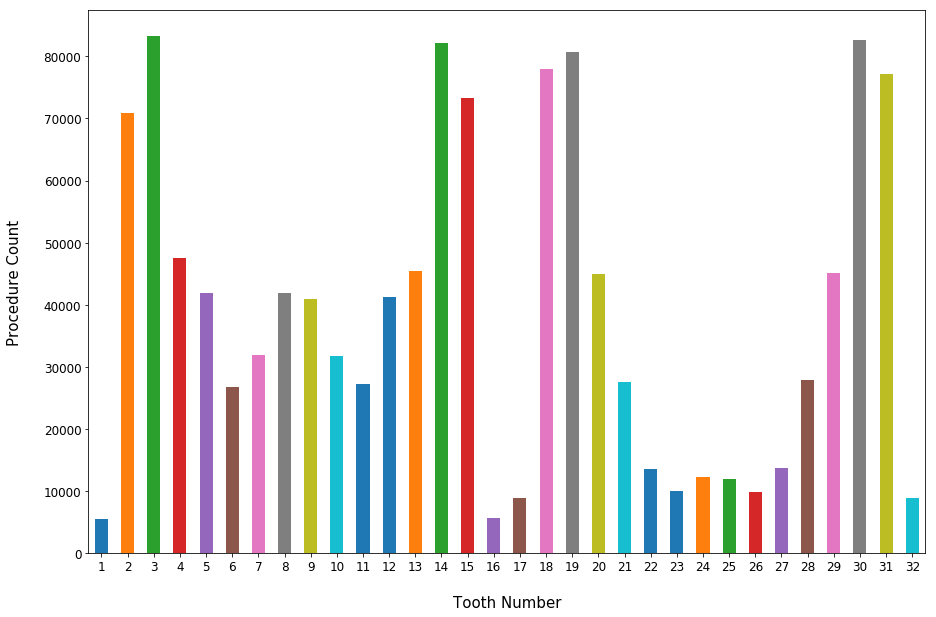

In [30]:
%matplotlib inline
# draw bar chart showing the number of procedures performed on each tooth (number)
ax = tooth_counts.plot.bar(figsize=(15,10)) 

# rotate the ticks on the x axis
plt.xticks(rotation=0)

# configure labels
# note the use of '\n' to create space between ticks and labels
ax.set_xlabel("\nTooth Number", fontsize=15)
ax.set_ylabel("Procedure Count\n", fontsize=15)
ax.tick_params(labelsize='large')

plt.show()

In [31]:
# build dataframe of teeth that have been extracted
# note the use of engine="python"
# df_extracted = df_obs[df_obs.extract_date.notnull()]
df_extracted = df_obs[~np.isnat(df_obs.extract_date)][['tooth_id','tooth_num','extract_date']]
# df_extracted = df_obs[~np.isnat(df_obs.extract_date)][['tooth_id','tooth_num']]
df_extracted.tooth_num = pds.to_numeric(df_extracted.tooth_num)
df_extracted.drop_duplicates(inplace=True)
df_extracted.head()

,tooth_id,tooth_num,extract_date
18,A_1_1_155_30,30,2009-12-02
31,A_1_1_329_4,4,2004-04-30
54,A_1_1_551_12,12,2014-07-07
122,A_1_1_3529_2,2,2008-04-26
130,A_1_1_3529_30,30,2014-10-18


In [32]:
# query results from triplestore
df_tooth1 = pds.read_csv('extracted_tooth_1_no_es.csv')
df_tooth1.drop_duplicates(inplace=True)
df_tooth1.head()

,tooth_num,tooth_id,extract_date
0,1,A_1_1_1_1,2003-05-16T00:00:00
1,1,A_1_1_2946_1,2012-01-30T00:00:00
2,1,A_1_1_149_1,2015-01-06T00:00:00
3,1,A_1_1_3046_1,2014-11-26T00:00:00
4,1,A_1_1_3302_1,2010-08-30T00:00:00


In [33]:
df_tooth1.tooth_num.value_counts()

1    954
Name: tooth_num, dtype: int64

In [34]:
# extract = df_obs[df_obs.tooth_id.isin(df_tooth1.tooth_id)][['tooth_id','tooth_num', 'extract_date']]
temp = df_obs.query("tooth_num == '1'")
extract = temp[df_obs.extract_date.notnull()][['tooth_id','tooth_num', 'extract_date']]
extract.drop_duplicates(inplace=True)
extract.head()

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,tooth_id,tooth_num,extract_date
275,A_1_1_1_1,1,2003-05-16
1084,A_1_1_149_1,1,2015-01-06
8836,A_1_1_2946_1,1,2012-01-30
13571,A_1_1_3302_1,1,2010-08-30
15481,A_1_1_3046_1,1,2014-11-26


In [35]:
extract.tooth_num.value_counts()

1    954
Name: tooth_num, dtype: int64

In [61]:
# extract.extract_date.unique()

In [37]:
extract2 = extract.drop_duplicates()
extract2.tooth_num.value_counts()

1    954
Name: tooth_num, dtype: int64

In [38]:
extract3 = extract[['tooth_id','tooth_num']].drop_duplicates()
extract3.tooth_num.value_counts()

1    953
Name: tooth_num, dtype: int64

In [62]:
# extract.extract_date.unique()

In [63]:
# extract[extract.extract_date.notnull()]['extract_date'].unique()

In [64]:
# temp = df_extracted[~df_extracted.tooth_id.isin(extract.tooth_id)]
# temp
# temp.tooth_num.value_counts()

In [66]:
tooth_counts = df_extracted.groupby('tooth_num').count()
tooth_counts

tooth_num
1.0      448
2.0     1129
3.0      935
4.0      719
5.0      659
6.0      337
7.0      453
8.0      416
9.0      401
10.0     434
11.0     320
12.0     665
13.0     729
14.0     910
15.0    1224
16.0     452
17.0     471
18.0    1112
19.0     958
20.0     542
21.0     305
22.0     123
23.0     179
24.0     191
25.0     198
26.0     171
27.0     118
28.0     306
29.0     570
30.0     947
31.0    1148
32.0     478
dtype: int64

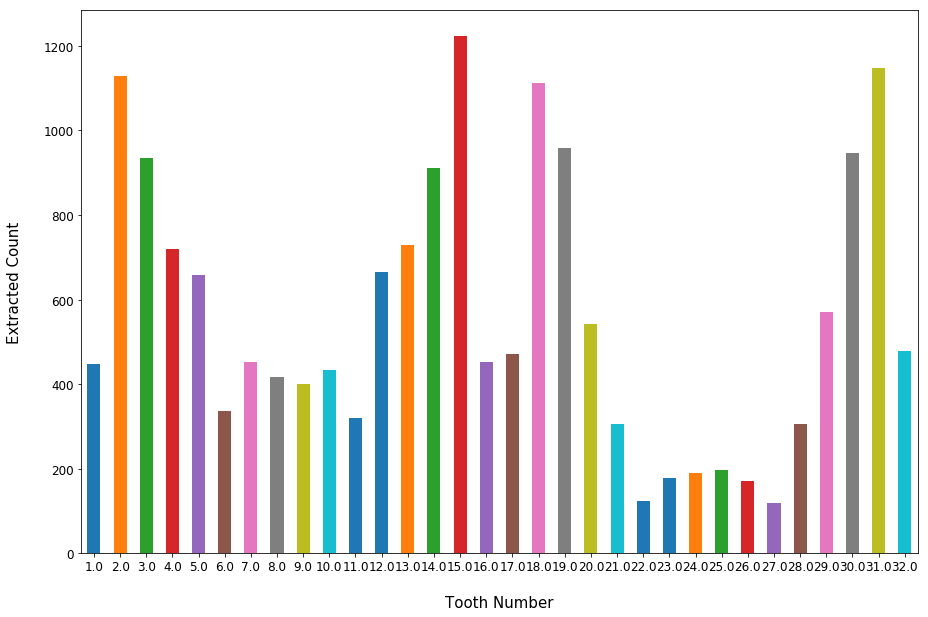

In [67]:
# plot extracted teeth according to tooth number
ax = tooth_counts.plot.bar(figsize=(15,10)) 

# rotate the ticks on the x axis
plt.xticks(rotation=0)

# configure labels
# note the use of '\n' to create space between ticks and labels
ax.set_xlabel("\nTooth Number", fontsize=15)
ax.set_ylabel("Extracted Count\n", fontsize=15)
ax.tick_params(labelsize='large')

plt.show()

In [68]:
# build dataframe of teeth that have been found missing
# note the use of engine="python"
df_missing = df_obs[df_obs.missing_date.notnull()]
df_missing.tooth_num = pds.to_numeric(df_extracted.tooth_num)


/usr/local/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [69]:
tooth_counts =df_missing.groupby('tooth_num').size()
# tooth_counts

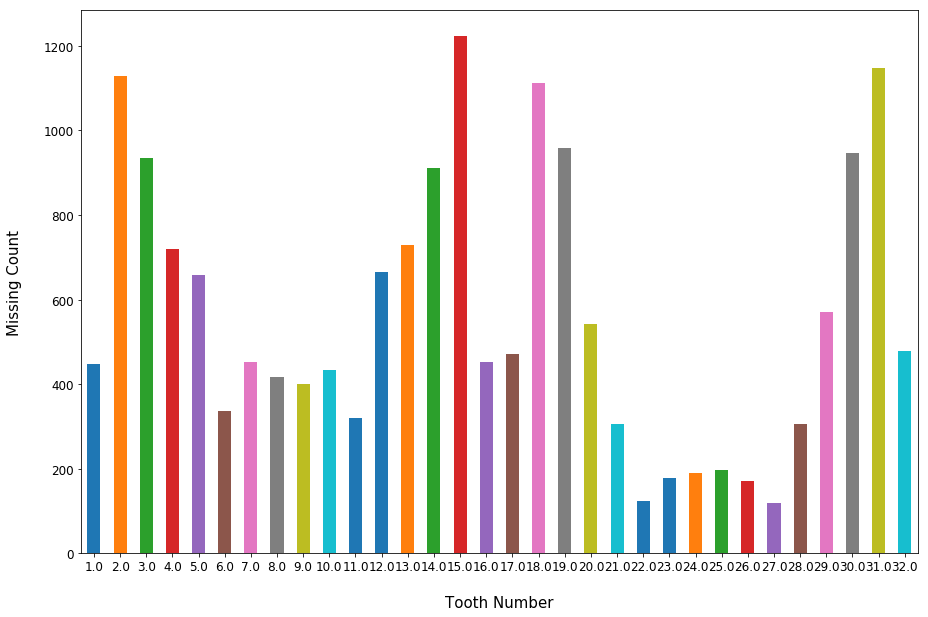

In [70]:
# plot missing teeth according to tooth number
ax = tooth_counts.plot.bar(figsize=(15,10)) 

# rotate the ticks on the x axis
plt.xticks(rotation=0)

# configure labels
# note the use of '\n' to create space between ticks and labels
ax.set_xlabel("\nTooth Number", fontsize=15)
ax.set_ylabel("Missing Count\n", fontsize=15)
ax.tick_params(labelsize='large')

plt.show()

In [47]:
def missing_flag_by_row(row):
    if pds.notnull(row['extract_date']) or pds.notnull(row['missing_date']):
        return 1
    else:
        return 0

def pcr_flag_by_row(row):
    if pds.notnull(row['extract_date']) or pds.notnull(row['missing_date']):
        return 1
    else:
        return 0

def pcr_flag_by_columns(extract_date, missing_date):
    if pds.notnull(extract_date) or pds.notnull(missing_date):
        return 1
    else:
        return 0

def pcr_flag_by_df(df):
    if pds.notnull(df.extract_date) or pds.notnull(df.missing_date):
        df['PCR_flag'] = 1
    else:
        df['PCR_flag'] = 0

# temp = df_obs.iloc[:100000, :]
temp = df_obs
temp['missing_flag'] = temp.apply(missing_flag_by_row, axis=1)

df_missing = temp[temp.missing_flag == 1]
# temp[['extract_date', 'missing_date', 'missing_flag']][temp.missing_flag == 0].head()

In [48]:
df_missing[df_missing.missing_flag == 0].head() # should be none ...

,practice,patient_id,gender,dob,first_visit,last_visit,tooth_id,tooth_num,first_PCR,first_RCT,...,ada_code,m,o,d,b,l,f,i,patient_age,missing_flag


In [49]:
# create dataframe of only suface info
df_surfaces = df_fillings[['m', 'o', 'd', 'b', 'l', 'f', 'i', 'num_restored_surfaces']]

# df_surfaces.head()

In [50]:
# calc number of surfaces restored for each surface
# note we are ignoring the number of restored surfaces (for now)
surface_counts = df_surfaces[['m', 'o', 'd', 'b', 'l', 'f', 'i']].apply(sum)

# surface_counts

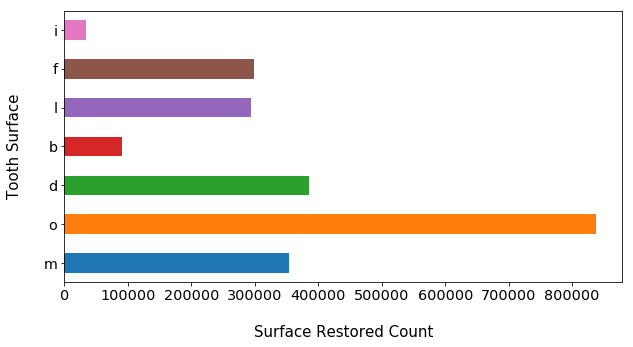

In [51]:
# create bar chart (flipped on its side) to show number of restorations per service
ax = surface_counts.plot.barh(figsize=(10,5))

# configure labels
ax.set_xlabel("\nSurface Restored Count", fontsize=15)
ax.set_ylabel("Tooth Surface\n", fontsize=15)
ax.tick_params(labelsize='x-large')

plt.show()

In [52]:
# calc number of surfaces restored on a tooth for each procedure (i.e., number of surfaces filled during procedure)
temp = pds.DataFrame(df_fillings[['tooth_num', 'num_restored_surfaces']]\
                        .groupby(['num_restored_surfaces', 'tooth_num']).size())

# temp.head()

In [53]:
# note the use of fill_values for NaN
restored_surface_counts = temp.unstack('num_restored_surfaces', fill_value=0)
restored_surface_counts.columns = ['1', '2', '3', '4', '5', '6']

# restored_surface_counts

In [54]:
# do some checks
# df_fillings.query('tooth_num == 32 and num_restored_surfaces == 5')['num_restored_surfaces'].count() # matches
# df_fillings.query('tooth_num == 30 and num_restored_surfaces == 5')['num_restored_surfaces'].count() # matches
# df_fillings.query('tooth_num == 20 and num_restored_surfaces == 2')['num_restored_surfaces'].count() # matches

In [55]:
# make simple plot of counts
# first do a check, and note that there are only 3 restorations of 6 surfaces (which seems not possible)
# the heatmap also reflects this ...
counts_per_surface = pds.DataFrame(restored_surface_counts.apply(sum))

# set index and column name
counts_per_surface.index.name = 'num_surfaces_restored'
counts_per_surface.columns = ['count']

# counts_per_surface

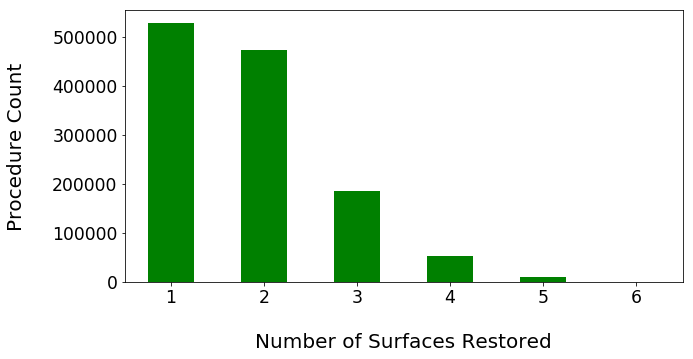

In [56]:
ax = counts_per_surface.plot.bar(figsize=(10,5), color='green', legend=False)

# configure X and Y labels
ax.set_xlabel("\nNumber of Surfaces Restored", fontsize=20)
ax.set_ylabel("Procedure Count\n", fontsize=20)
ax.tick_params(labelsize='xx-large')

# rotate the ticks on the x axis
plt.xticks(rotation=0)

plt.show()

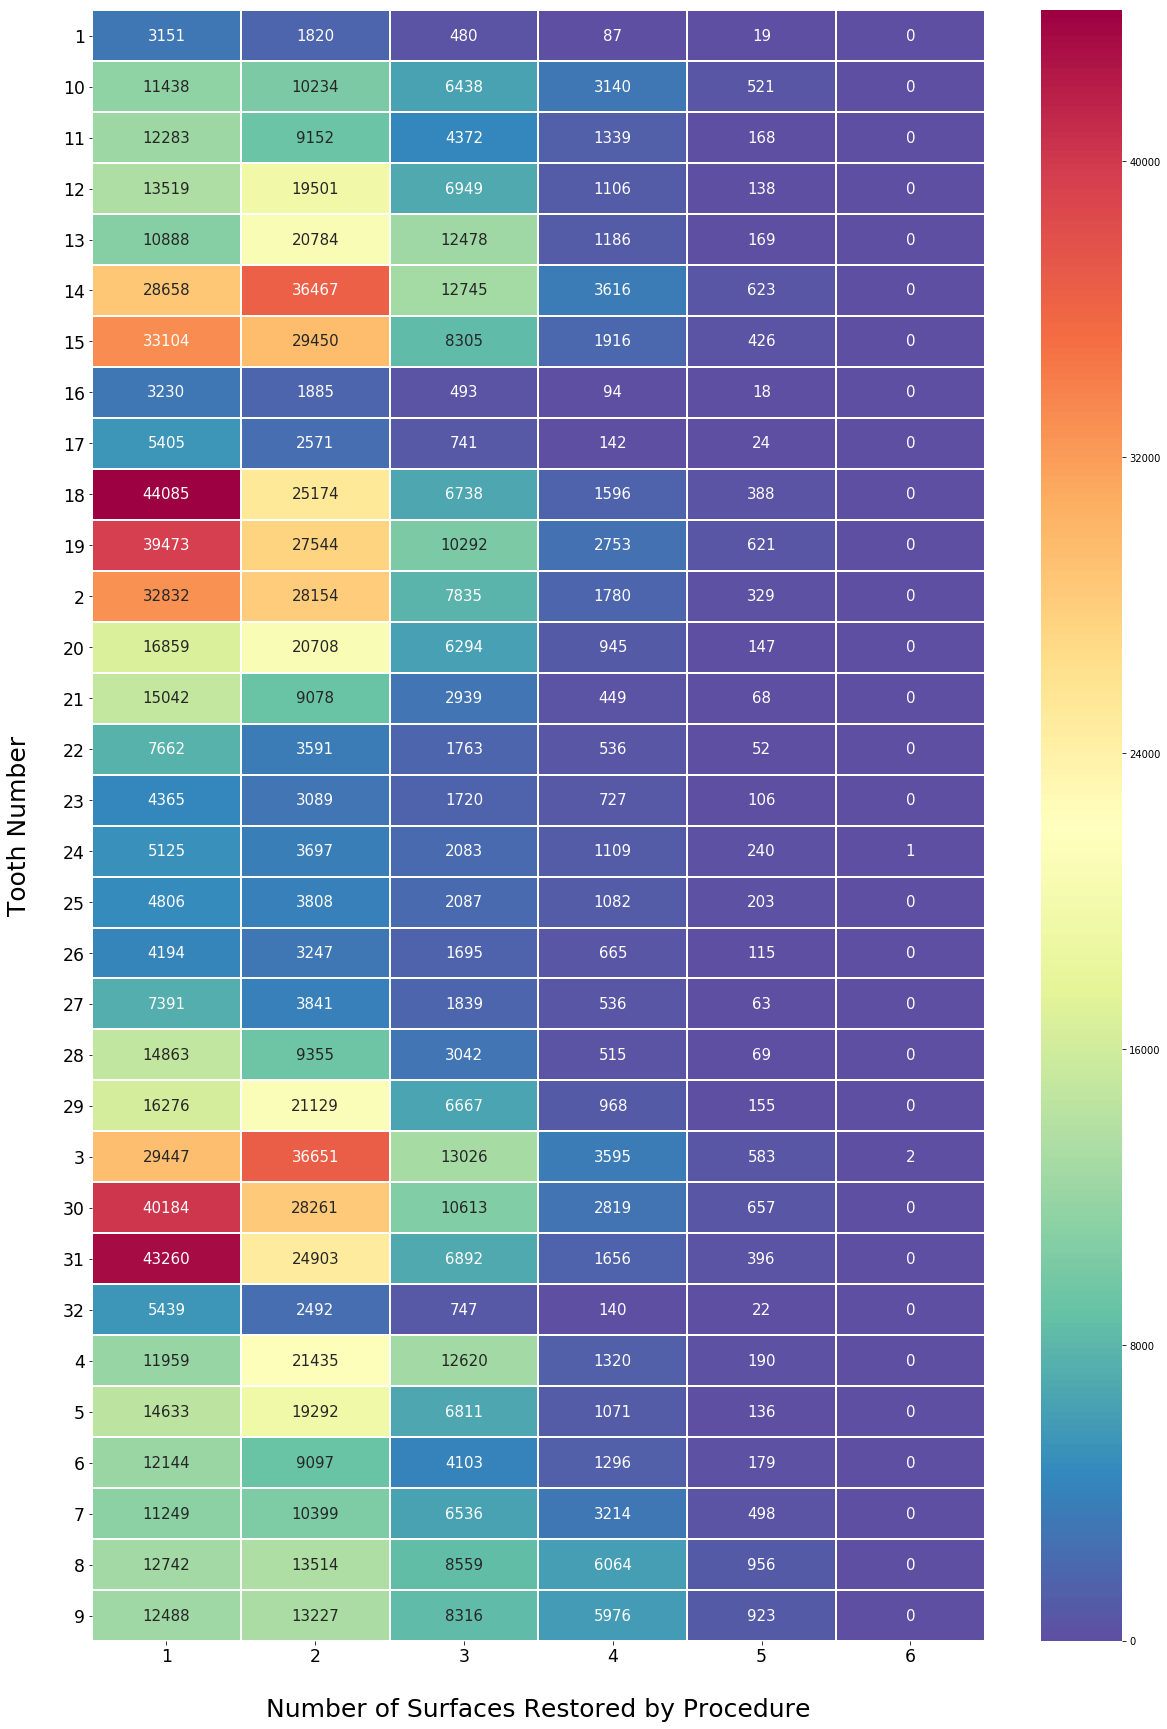

In [57]:
plt.figure(figsize = (20,30)) # this sets width and height of the figure

# fmt='d' means annotations are digits, annot_kws={"size":15} sets the size of the annotation font
ax = sns.heatmap(restored_surface_counts, cmap='Spectral_r', linewidths=1.0, annot=True, fmt='d', annot_kws={"size":15})

# rotate the ticks on the y axis
plt.yticks(rotation=0)

# configure X and Y labels
ax.set_ylabel("Tooth Number\n", fontsize=25)
ax.set_xlabel("\nNumber of Surfaces Restored by Procedure", fontsize=25)
ax.tick_params(labelsize='xx-large')

plt.show()